In [ ]:
!pip install geopandas
!pip install contextily
import geopandas
import contextily as ctx

     |████████████████████████████████| 1.0 MB 22.7 MB/s 
     |████████████████████████████████| 6.3 MB 54.1 MB/s 
     |████████████████████████████████| 15.4 MB 52.2 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
autostrade = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Autostrade_10000_CT10_line/Autostrade_10000_CT10_line.dbf')
autostrade

TS_EID  ...                                           geometry
0     19.0  ...  LINESTRING (496352.634 4981573.415, 496378.384...
1     18.0  ...  LINESTRING (580517.421 4994637.417, 580735.915...
2     21.0  ...  LINESTRING (580524.796 4994628.417, 580745.039...
3     65.0  ...  LINESTRING (521699.514 5024872.823, 521630.139...
4     62.0  ...  LINESTRING (504384.530 5044095.266, 504414.405...
5     90.0  ...  LINESTRING (519364.775 5030574.241, 519401.151...
6     78.0  ...  LINESTRING (519346.650 5030596.741, 519377.151...
7      7.0  ...  LINESTRING (519364.775 5030574.241, 519352.525...
8      8.0  ...  LINESTRING (519346.650 5030596.741, 519337.900...
9   1922.0  ...  LINESTRING (485557.854 5069342.204, 485588.231...
10   130.0  ...  LINESTRING (510188.551 5038184.696, 510192.926...
11   131.0  ...  LINESTRING (510188.551 5038184.696, 510186.301...
12   136.0  ...  LINESTRING (473152.912 5061873.298, 473252.162...
13   137.0  ...  LINESTRING (484526.009 5057918.338, 484520.884...
14   139.0  ...  LINESTRING (500884.722 5047505.292, 500903.352...
15   140.0  ...  LINESTRING (500870.596 5047376.792, 500867.222...
16  1915.0  ...  LINESTRING (509605.078 5040334.699, 509647.828...
17  1916.0  ...  LINESTRING (509605.078 5040334.699, 509629.203...
18  1917.0  ...  LINESTRING (596248.468 5039919.217, 596292.768...
19  1918.0  ...  LINESTRING (596332.966 5039880.716, 596384.466...
20    45.0  ...  LINESTRING (483693.626 5035220.147, 483734.501...
21    46.0  ...  LINESTRING (483695.626 5035199.648, 483732.375...
22    17.0  ...  LINESTRING (496361.009 4981571.915, 496395.134...
23   104.0  ...  LINESTRING (520374.739 5040918.650, 520381.740...
24   106.0  ...  LINESTRING (520336.615 5041012.149, 520323.115...
25   108.0  ...  LINESTRING (492935.511 4982476.902, 492950.261...
26   117.0  ...  LINESTRING (492950.136 4982450.903, 492978.386...
27  1921.0  ...  LINESTRING (503796.065 5010493.180, 503819.315...
28   162.0  ...  LINESTRING (510485.383 5004513.739, 510475.134...
29    23.0  ...  LINESTRING (646612.131 5012922.197, 646598.255...
30    24.0  ...  LINESTRING (646596.507 5012927.197, 646582.506...

[31 rows x 4 columns]

In [ ]:
autostrade.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

1. Visualizzare su una mappa le autostrade, colorandole in modo diverso a seconda della loro lunghezza.
Usare la scala dei colori del rosso (2 pt.)

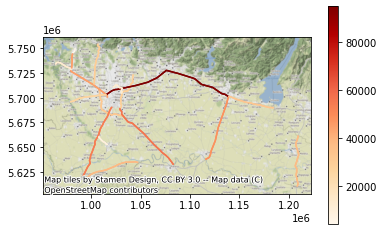

In [ ]:
autostrade['lunghezza'] = autostrade.length 
ax = autostrade.to_crs(epsg=3857).plot(column='lunghezza',legend=True,cmap='OrRd')
ctx.add_basemap(ax)

2. Visualizzare in grigio su una mappa le autostrade che sono più lunghe di un certo valore inserito dall'utente. Controllare che l'utente inserisca valori positivi: dare un messaggio opportuno in caso negativo. La distanza deve essere inserita usando i km come unità di misura (3 pt.)

In [ ]:
autostrade.lunghezza

0     38486.155957
1     48344.907019
2     48349.575202
3     32007.903104
4     32551.215108
5     29014.227484
6     29042.427289
7     56753.401996
8     56794.464397
9      4423.376768
10    45199.883333
11    45219.261216
12    13809.869553
13    13480.491067
14    30036.749879
15    30100.954272
16    94953.707586
17    95034.017723
18    33467.932926
19    33381.167747
20    26606.993010
21    26613.854695
22    38469.136057
23    12604.775868
24    12484.889649
25    54217.298922
26    54260.620801
27     9066.502468
28     8920.815180
29    37848.218099
30    37852.897213
Name: lunghezza, dtype: float64

Inserire lunghezza autostrada: 8920.815180


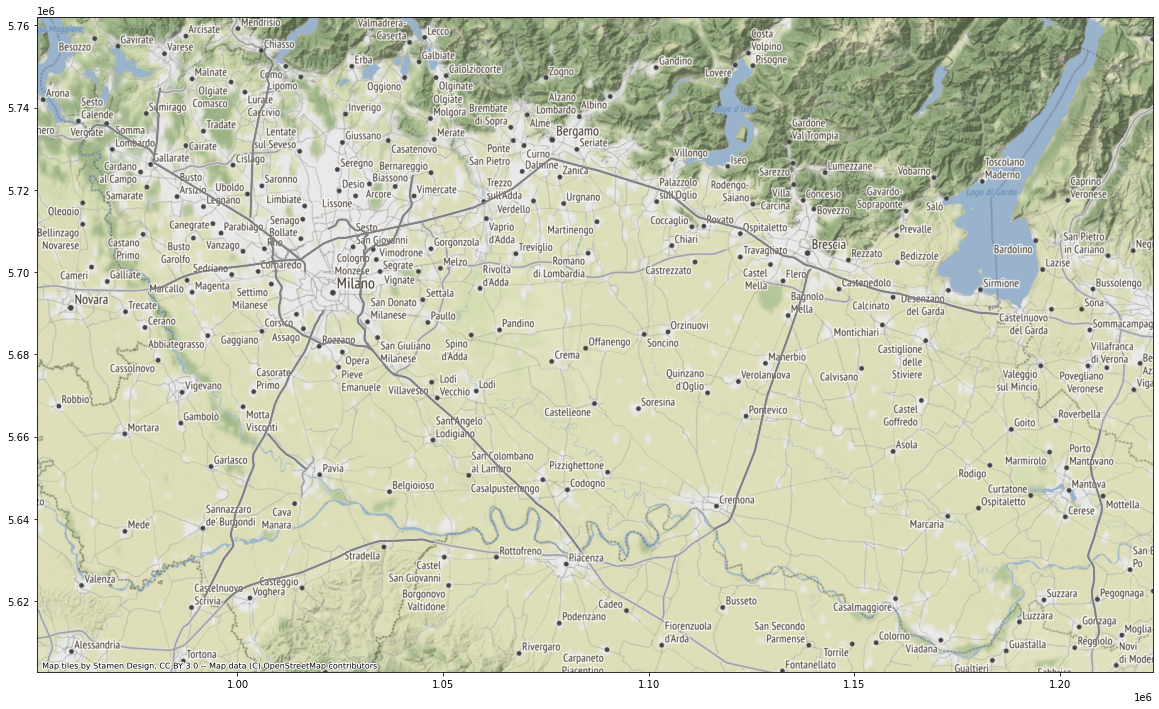

In [ ]:
user = float(input('Inserire lunghezza autostrada: '))
if user < 0:
  print('Lunghezza errata')
else:
  autostrada = autostrade[autostrade.lunghezza > user]
  ax = autostrada.to_crs(epsg=3857).plot(figsize=(20,15),color = 'grey')
  ctx.add_basemap(ax)

3. Visualizzare su una mappa i corsi d'acqua che non sono attraversati da autostrade (2 pt.)

In [ ]:
corsi_acqua = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione/Corsi_acqua_Piano_di_Gestione.dbf')

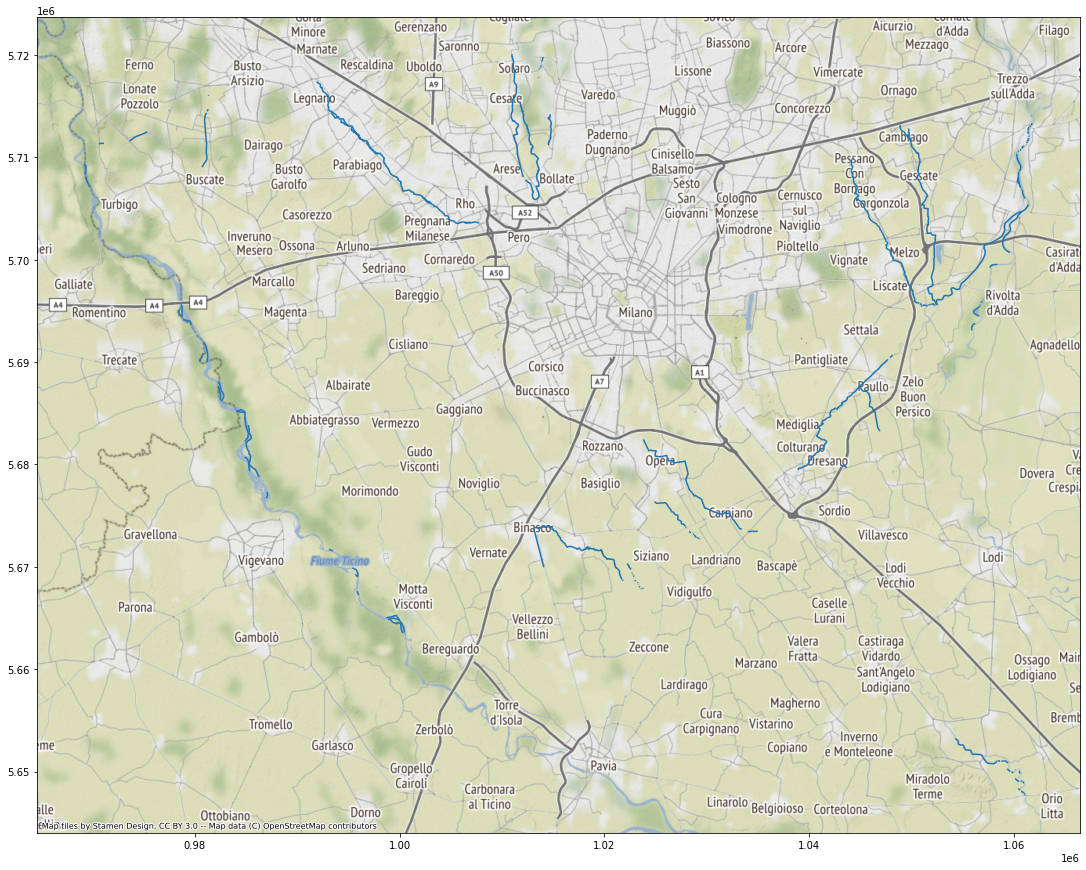

In [ ]:
corsi_noautostrade = corsi_acqua[corsi_acqua.intersects(autostrade.unary_union)==False]
ax = corsi_noautostrade.to_crs(epsg=3857).plot(figsize=(20,15))
ctx.add_basemap(ax)

4. Visualizzare su una mappa i comuni limitrofi di un comune inserito dall'utente. Il comune inserito deve essere colorato di blu e quelli limitrofi devono essere colorati di giallo (2 pt.)

In [ ]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf')

Inserire comune: Milano


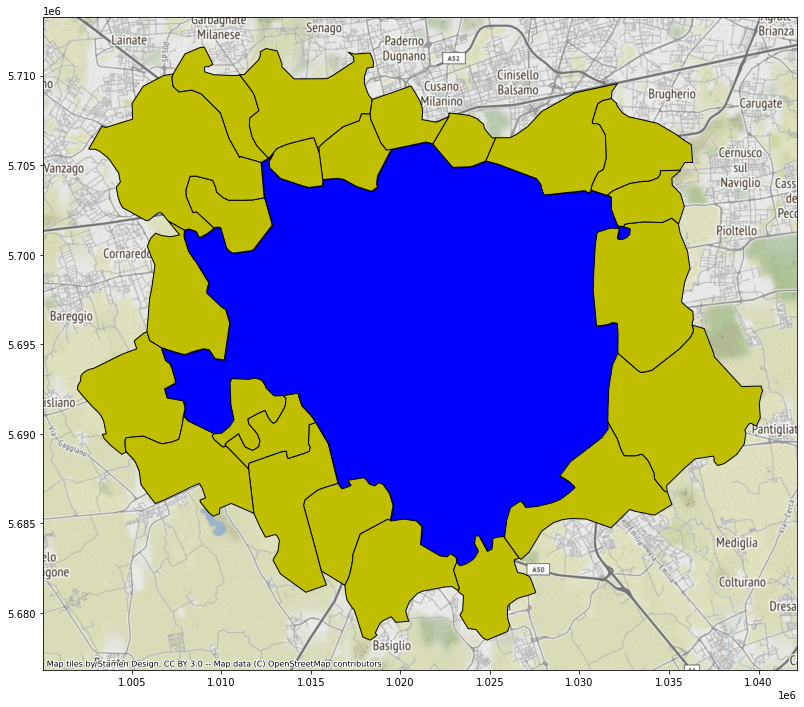

In [ ]:
user = input('Inserire comune: ')
lst = list(comuni['COMUNE'])
if user not in lst:
  print('Comune inesistente')
else:
  comu = comuni[comuni['COMUNE'] == user].geometry.squeeze()
  comu2 = comuni[comuni['COMUNE'] == user]
  ax = comuni[comuni.touches(comu)].to_crs(epsg=3857).plot(edgecolor='k',facecolor='y',figsize=(20,12))
  comu2.to_crs(epsg=3857).plot(ax=ax,edgecolor='k', facecolor='b')
  ctx.add_basemap(ax)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
